# Handwritten digits classification using CNN

In [58]:
import tensorflow as tf
from tensorflow import keras
from keras import models,layers
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [7]:
len(X_train)

60000

In [8]:
len(X_test)

10000

In [9]:
X_train[0].shape

(28, 28)

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

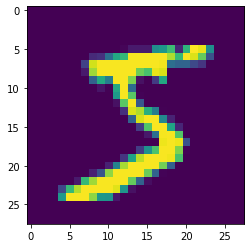

In [11]:
plt.imshow(X_train[0])

In [12]:
y_train[0]

5

In [13]:
# Normalizing the X_train and X_test
X_train = X_train / 255
X_test = X_test / 255

In [14]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
X_train.shape

(60000, 28, 28)

In [21]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [19]:
X_train_flattened.shape

(60000, 784)

In [22]:
X_test_flattened.shape

(10000, 784)

In [24]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [25]:
len(X_train_flattened[0])

784

In [27]:
y_train.shape

(60000,)

In [29]:
# Trying an ANN with no hidden layers

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train_flattened, y_train, epochs =5)

Epoch 1/5
1875/1875 [==============================] - 4s 1ms/step - loss: 0.7065 - accuracy: 0.8198
Epoch 2/5
1875/1875 [==============================] - 2s 947us/step - loss: 0.3132 - accuracy: 0.9133
Epoch 3/5
1875/1875 [==============================] - 2s 945us/step - loss: 0.2891 - accuracy: 0.9199
Epoch 4/5
1875/1875 [==============================] - 2s 958us/step - loss: 0.2698 - accuracy: 0.9245
Epoch 5/5
1875/1875 [==============================] - 2s 947us/step - loss: 0.2695 - accuracy: 0.9239


In [30]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2665 - accuracy: 0.9258


[0.2664923667907715, 0.9258000254631042]

In [31]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.3299038e-02, 2.5420485e-07, 5.0118029e-02, 9.4488406e-01,
       2.1597445e-03, 1.0693592e-01, 1.2553410e-06, 9.9978173e-01,
       8.6628288e-02, 6.3491595e-01], dtype=float32)

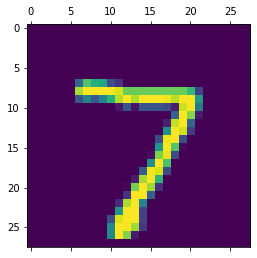

In [34]:
plt.matshow(X_test[0])

In [36]:
np.argmax(y_predicted[0]) # np.argmax finds the maximum element in an array and returns the index of it

7

In [38]:
y_predicted_labels = [np.argmax(label) for label in y_predicted]

In [39]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [40]:
# Confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    5,    8,    2,    1,    0],
       [   0, 1108,    3,    2,    1,    1,    4,    2,   14,    0],
       [   7,    9,  912,   16,   11,    5,   13,   11,   44,    4],
       [   4,    0,   17,  913,    0,   29,    2,   12,   27,    6],
       [   1,    1,    2,    1,  917,    0,   12,    4,    9,   35],
       [  10,    2,    2,   21,   10,  785,   15,    8,   32,    7],
       [  10,    3,    5,    1,    8,   14,  913,    2,    2,    0],
       [   1,    5,   20,    5,    8,    0,    0,  955,    3,   31],
       [   7,    6,    5,   16,    9,   25,    9,   13,  877,    7],
       [  11,    7,    1,    9,   24,    6,    0,   30,    4,  917]])>

Text(69.0, 0.5, 'Actual')

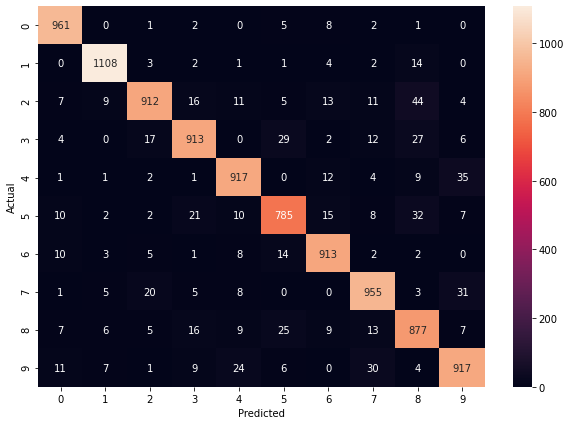

In [45]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Using Hidden Layer

In [46]:
model = keras. Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4508 - accuracy: 0.8755
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1301 - accuracy: 0.9627
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0885 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0654 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0538 - accuracy: 0.9838


In [47]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 891us/step - loss: 0.0837 - accuracy: 0.9753


[0.08365340530872345, 0.9753000140190125]

Text(69.0, 0.5, 'Actual')

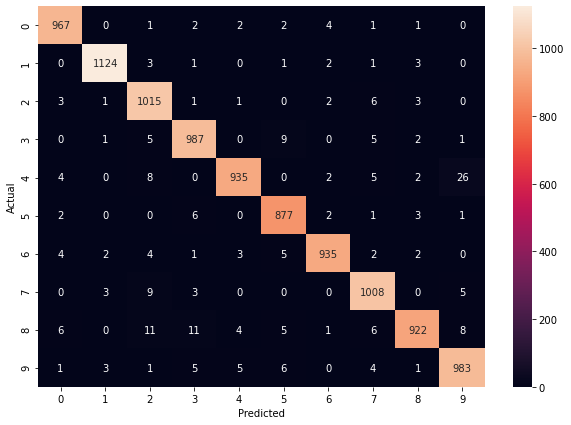

In [49]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Using Flatten layer so that we don't have to call .reshape on input dataset

In [51]:
ANN = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

ANN.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ANN.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4490 - accuracy: 0.8753
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1300 - accuracy: 0.9622
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0890 - accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0656 - accuracy: 0.9807
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0507 - accuracy: 0.9852
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0384 - accuracy: 0.9884
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0295 - accuracy: 0.9915
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0268 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0195 - accuracy: 0.9945
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.015

In [53]:
ANN.evaluate(X_test, y_test)

313/313 [==============================] - 0s 876us/step - loss: 0.0805 - accuracy: 0.9789


[0.08053869009017944, 0.9789000153541565]

In [62]:
X_train.shape

(60000, 28, 28)

## Implimenting CNN

In [65]:
X_train = X_train.reshape(-1, 28,28,1)
X_test = X_test.reshape(-1, 28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [67]:
CNN = models.Sequential([
    
    layers.Conv2D(filters=32, kernel_size = (3,3), activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size= (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation = 'sigmoid')
])

CNN.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

CNN.fit(X_train, y_train, epochs=10)



Epoch 1/10
1875/1875 [==============================] - 30s 15ms/step - loss: 0.2973 - accuracy: 0.9073
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0443 - accuracy: 0.9870
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0302 - accuracy: 0.9904
Epoch 4/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0196 - accuracy: 0.9935
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0153 - accuracy: 0.9950
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0117 - accuracy: 0.9963
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0088 - accuracy: 0.9972
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0076 - accuracy: 0.9974
Epoch 9/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0070 - accuracy: 0.99760s - loss: 0.0
Epoch 10/10
1875/1875 [===========================

In [68]:
CNN.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0385 - accuracy: 0.9918


[0.03852945938706398, 0.9918000102043152]